# Cell 1: Import Dependencies

In [2]:
# Import pandas for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import matplotlib.pyplot for creating static visualizations
import matplotlib.pyplot as plt
# Import seaborn for enhanced statistical visualizations
import seaborn as sns
# Configure matplotlib to display plots inline in the notebook
%matplotlib inline

# Cell 2: Load the Dataset

In [ ]:
# Cell 2: Load the Dataset
import os

# Check if running in a CI environment (e.g., GitHub Actions) or locally
if os.getenv('CI', 'false').lower() == 'true':
    # In CI, create a mock DataFrame to avoid FileNotFoundError
    print("Running in CI environment; using mock data.")
    df = pd.DataFrame()  # Empty DataFrame for CI validation
else:
    # Load the dataset from the raw data directory locally
    # Assumes the dataset is stored in '../data/raw/data.csv'
    df = pd.read_csv('../data/raw/data.csv')

# Verify the DataFrame is loaded (will be empty in CI)
print("Dataset loaded with shape:", df.shape)

# Cell 3: Performing EDA

## 1. Overview of the Data
Understand the dataset’s structure, including rows, columns, and data types.

**Purpose**: Confirm the number of records, columns, and their data types to understand the dataset’s structure.

**Expected Output**: Displays the number of rows/columns, data types (e.g., TransactionId as object, Amount as float), and a preview of the data.

In [4]:
# Print the shape of the dataset (number of rows and columns)
print("Dataset Shape:", df.shape)
# Print a blank line for readability
print("\nData Types:\n", df.dtypes)
# Display the first five rows of the dataset to preview its structure
print("\nFirst Few Rows:\n", df.head())

Dataset Shape: (95662, 16)

Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First Few Rows:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_281

## 2. Summary Statistics
Analyze central tendency, dispersion, and distribution shape.

**Purpose**: Identify ranges, means, medians, and potential outliers for numerical features like Amount and Value.

**Expected Insight**: Check for negative values in Amount (indicating credits) and verify if Value is always positive (absolute amount).

In [5]:
# Compute and display summary statistics (count, mean, std, min, max, quartiles) for numerical columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


## 3. Distribution of Numerical Features
Visualize distributions to identify patterns, skewness, and outliers.

**Purpose**: Understand the distribution shape (e.g., skewed, normal) and identify potential outliers.

**Expected Insight**: **Amount** may show a skewed distribution with both positive (debits) and negative (credits) values, while **Value** should be strictly positive.

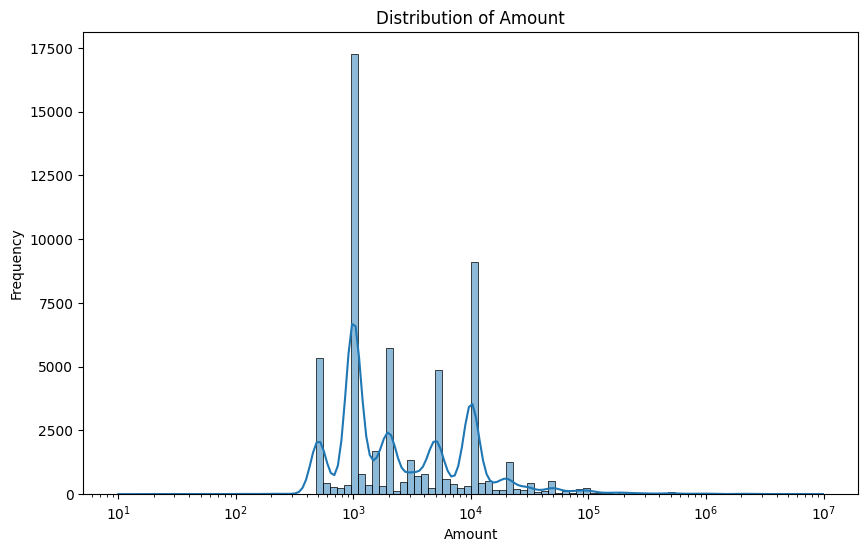

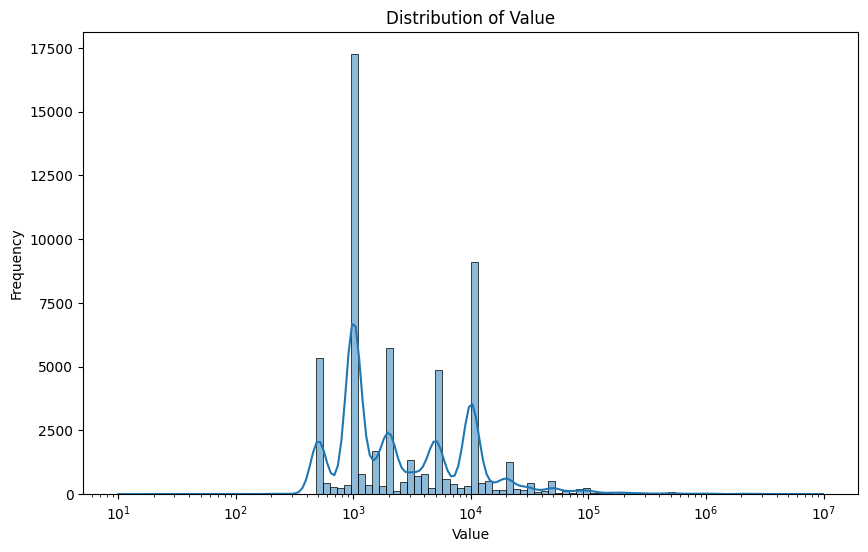

In [13]:
# Define the numerical features to analyze
numerical_features = ['Amount', 'Value']
# Iterate through each numerical feature to create a histogram
for feature in numerical_features:
    # Create a new figure with specified size (10 inches wide, 6 inches tall)
    plt.figure(figsize=(10, 6))
    # Plot a histogram with 50 bins and a kernel density estimate (KDE) curve
    sns.histplot(df['Amount'], bins=100, kde=True, log_scale=True)
    # Set the title of the plot
    plt.title(f'Distribution of {feature}')
    # Label the x-axis with the feature name
    plt.xlabel(feature)
    # Label the y-axis as 'Frequency'
    plt.ylabel('Frequency')
    # Display the plot
    plt.show()

## 4. Distribution of Categorical Features
Analyze the frequency and variability of categorical features.

**Purpose**: Identify dominant categories and their frequencies.

**Expected Insight**: **ProductCategory** may show dominance of categories like **airtime**, and **FraudResult** may be heavily imbalanced (mostly 0).

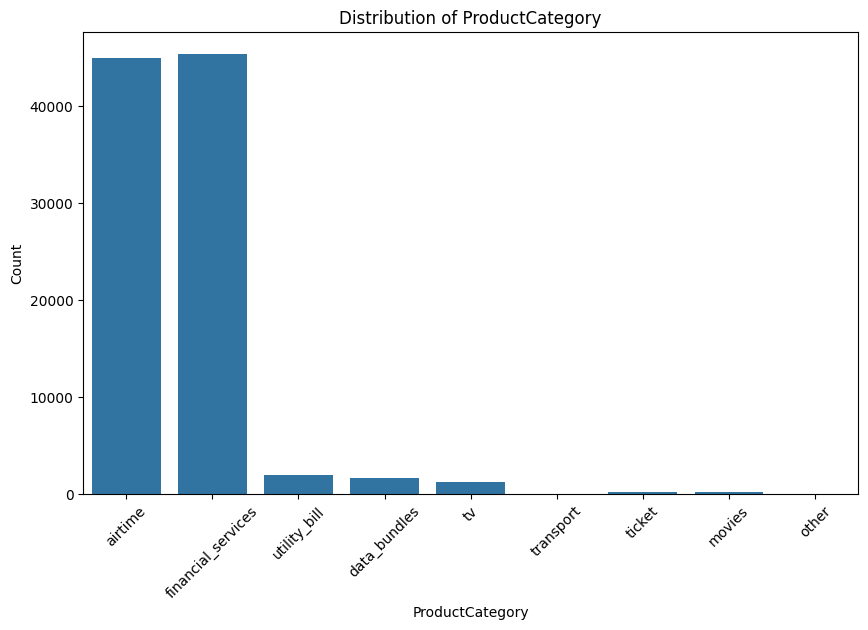

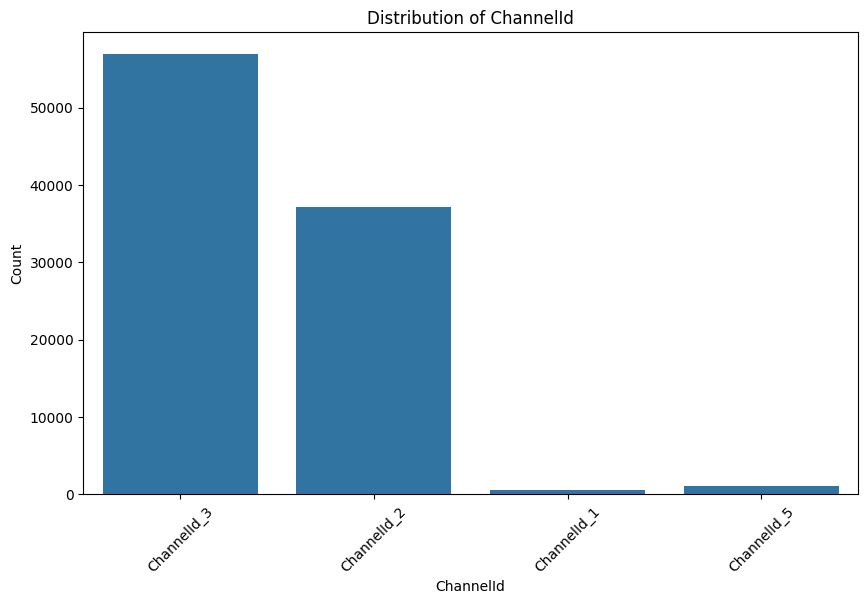

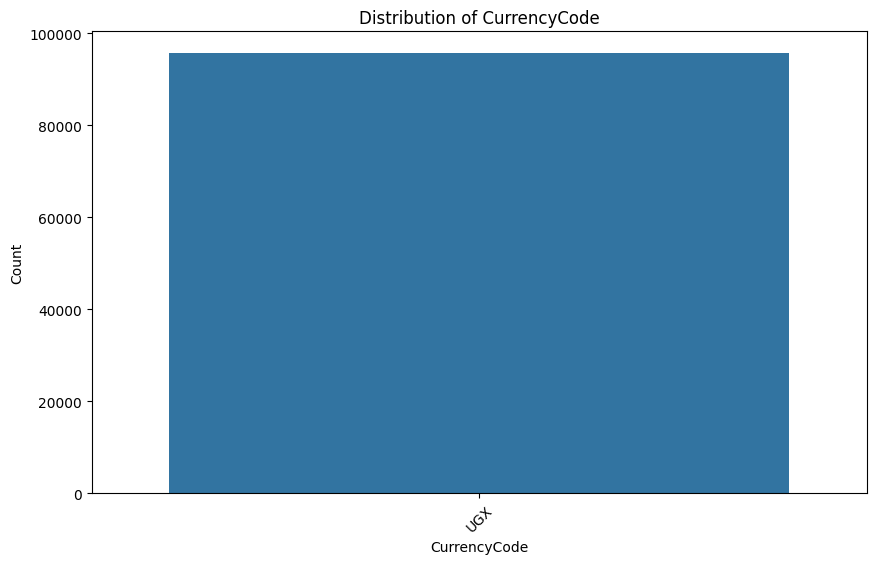

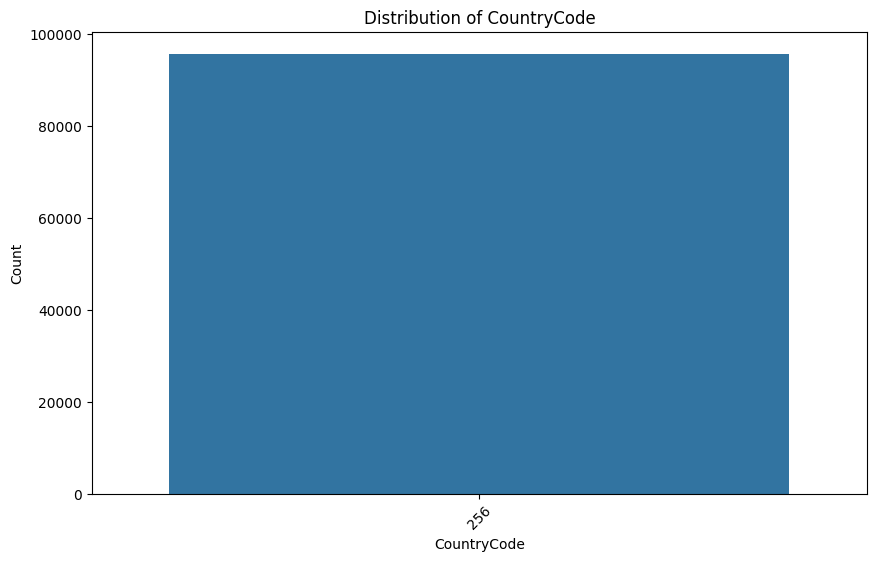

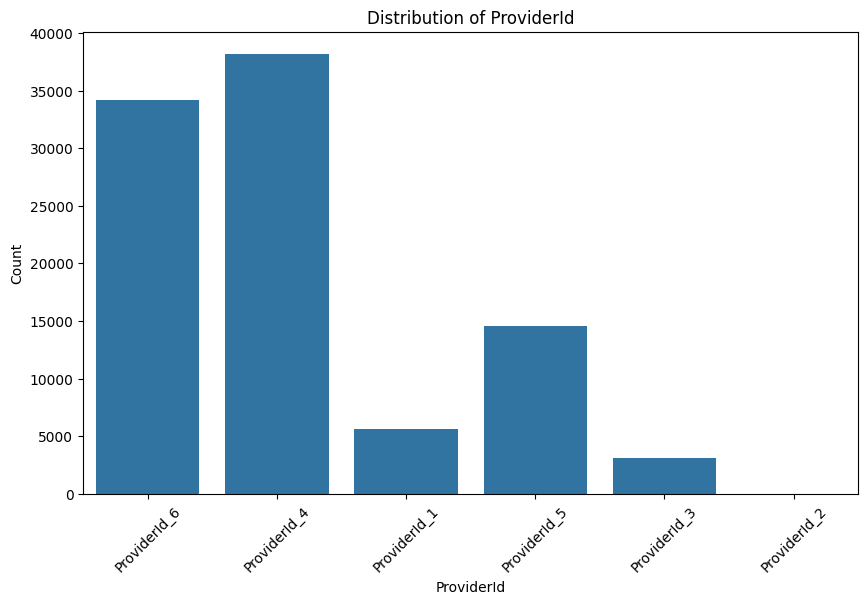

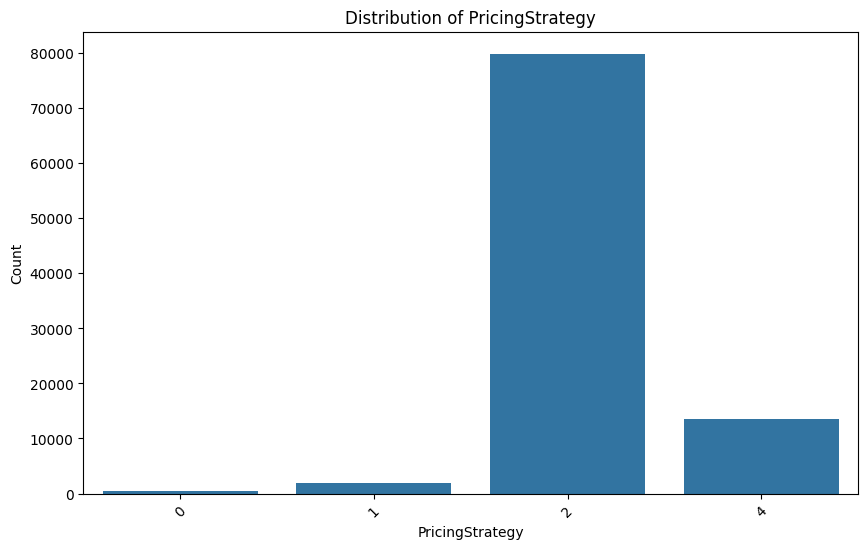

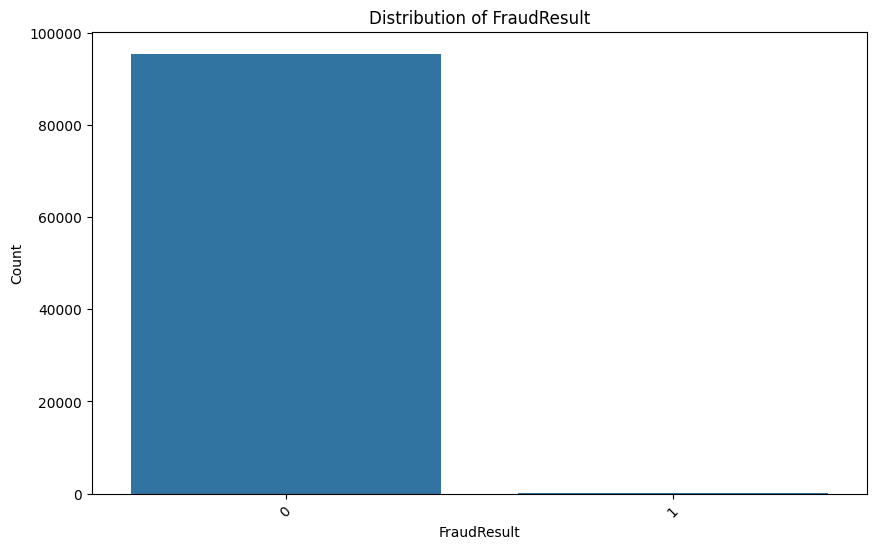

In [7]:
# Define the categorical features to analyze
categorical_features = ['ProductCategory', 'ChannelId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'PricingStrategy', 'FraudResult']
# Iterate through each categorical feature to create a count plot
for feature in categorical_features:
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))
    # Plot a count plot showing the frequency of each category
    sns.countplot(data=df, x=feature)
    # Set the title of the plot
    plt.title(f'Distribution of {feature}')
    # Label the x-axis with the feature name
    plt.xlabel(feature)
    # Label the y-axis as 'Count'
    plt.ylabel('Count')
    # Rotate x-axis labels by 45 degrees for readability
    plt.xticks(rotation=45)
    # Display the plot
    plt.show()

## 5. Correlation Analysis
Examine relationships between numerical features.

**Purpose**: Identify strong correlations (e.g., between **Amount** and **Value**) to avoid redundancy in feature engineering.

**Expected Insight**: High correlation between **Amount** and **Value** (since Value is the absolute of Amount).

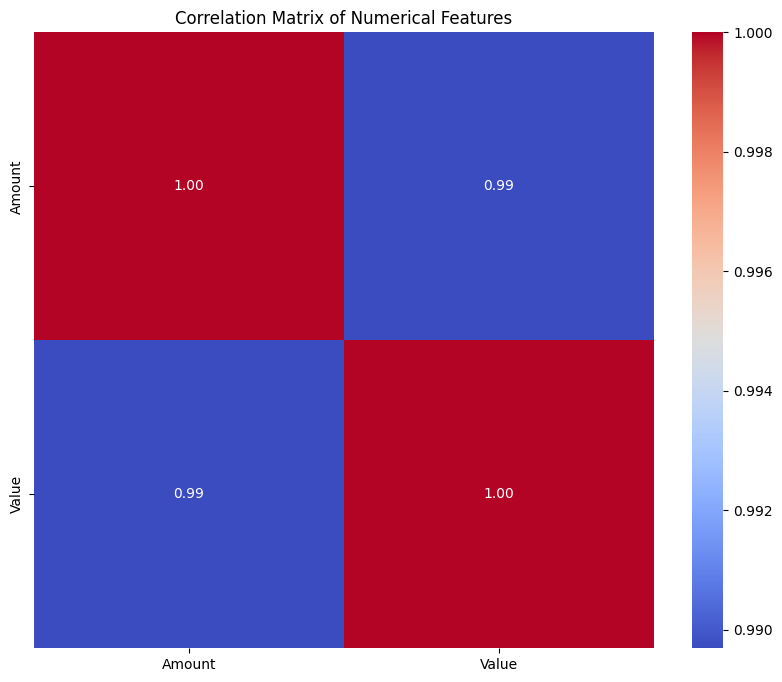

In [8]:
# Create a new figure for the correlation matrix
plt.figure(figsize=(10, 8))
# Compute the correlation matrix for numerical features and plot as a heatmap
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
# Set the title of the plot
plt.title('Correlation Matrix of Numerical Features')
# Display the plot
plt.show()

## 6. Identifying Missing Values
Check for missing data to inform imputation strategies.

**Purpose**: Quantify missing data to decide whether to impute or remove.

**Expected Insight**: The dataset may have minimal missing values, but any missing data in key features like **Amount** or **CustomerId** will require imputation.

In [9]:
# Print the count of missing values for each column
print("\nMissing Values:\n", df.isnull().sum())
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
# Print the percentage of missing values
print("\nMissing Values Percentage:\n", missing_percentage)


Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Missing Values Percentage:
 TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64


## 7. Outlier Detection
Use box plots to identify outliers in numerical features.

**Purpose**: Detect extreme values that may skew model training.

**Expected Insight**: **Amount** may have outliers due to large transactions or credits, which need handling (e.g., capping or log transformation).

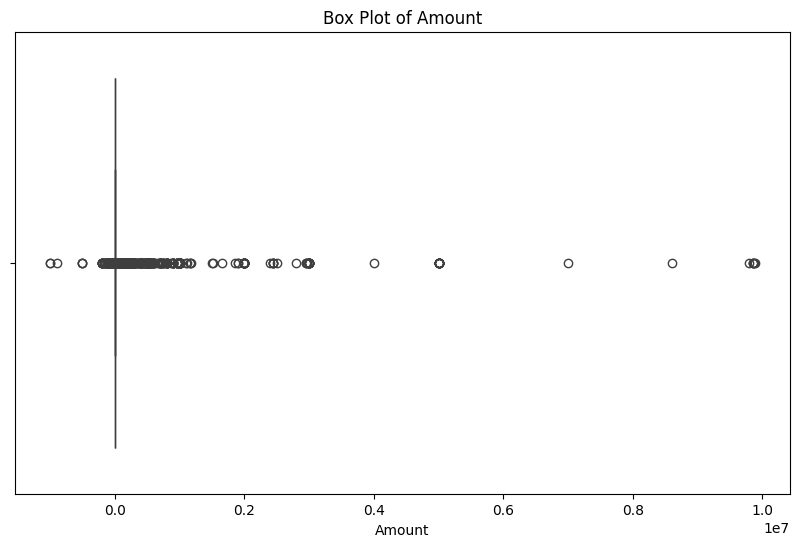

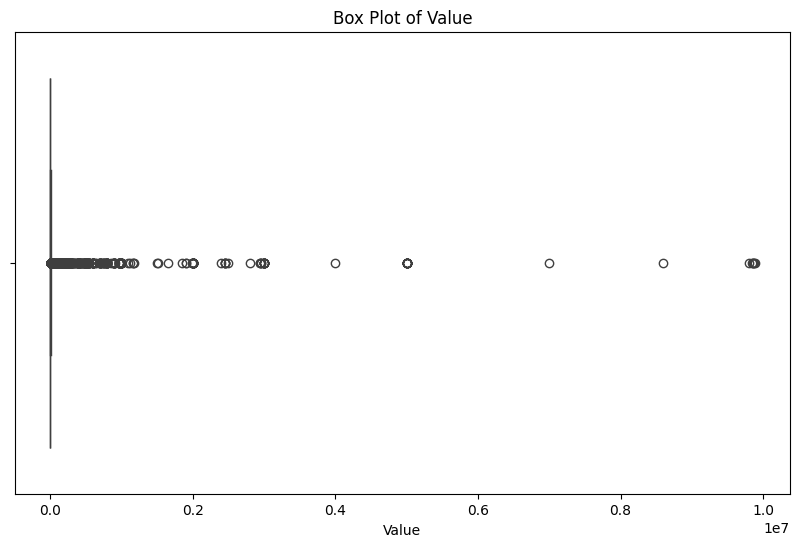

In [10]:
# Iterate through each numerical feature to create a box plot
for feature in numerical_features:
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))
    # Plot a box plot to visualize the distribution and outliers
    sns.boxplot(data=df, x=feature)
    # Set the title of the plot
    plt.title(f'Box Plot of {feature}')
    # Label the x-axis with the feature name
    plt.xlabel(feature)
    # Display the plot
    plt.show()

## 8.Temporal Analysis

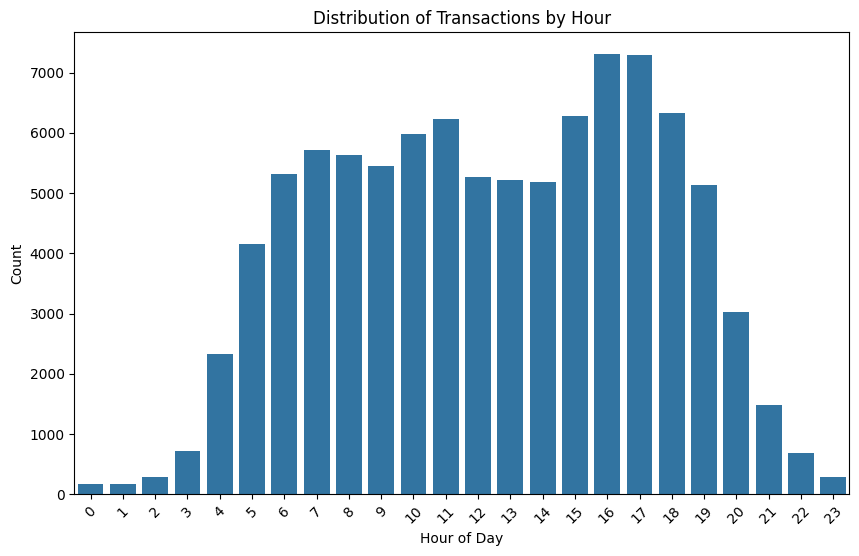

In [12]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
# Extract hour and create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['TransactionStartTime'].dt.hour)
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 9. Save Processed Data
Save the dataset to the processed data directory for use in subsequent tasks.

**Purpose**: Ensure the raw dataset is preserved and a copy is available for feature engineering.

**Note**: No transformations are applied here, as feature engineering will be handled in Task 3.

In [11]:
# Create the processed data directory if it doesn't exist
import os
os.makedirs('../data/processed', exist_ok=True)
# Save the dataset to the processed directory without modifications
# This preserves the raw data for EDA while creating a copy for future tasks
df.to_csv('../data/processed/xente_data_processed.csv', index=False)
# Confirm the data has been saved
print("Processed data saved to '../data/processed/xente_data_processed.csv'")

Processed data saved to '../data/processed/xente_data_processed.csv'


# Last Cell : Summarize Top 3-5 Insights
Based on the EDA, document key findings to guide feature engineering and modeling.

In [14]:
# Import Markdown display for rendering formatted text
from IPython.display import display, Markdown

# Define the insights as a Markdown string with the enhanced transaction amount distribution
insights = """
### Top 5 Key Insights from EDA
1. **Transaction Amount Distribution**: The `Amount` feature exhibits a multi-modal, highly skewed distribution, with prominent peaks at approximately \(10^1\) (10–100 units, likely small credits), \(10^3\) (1,000–10,000 units, common debits), and smaller peaks at \(10^4\) and \(10^5\), with rare transactions extending to \(10^7\). This indicates a wide range of transaction sizes and significant outliers, necessitating transformation (e.g., log scaling) or binning during feature engineering to address skewness and improve model robustness.
2. **Product Category Dominance**: The `ProductCategory` feature shows that `airtime` and `financial_services` are the most frequent categories, suggesting these are key customer behaviors to focus on for RFM analysis.
3. **Fraud Result Imbalance**: The `FraudResult` feature is heavily imbalanced, with less than 1% of transactions labeled as fraudulent (1), which may limit its utility as a direct proxy for credit risk but could inform feature engineering.
4. **Correlation Between Amount and Value**: The `Amount` and `Value` features are highly correlated (close to 1), as `Value` is the absolute value of `Amount`. One of these features may be redundant for modeling.
5. **Temporal Transaction Patterns**: The `TransactionStartTime` analysis reveals a diurnal pattern in transaction activity, with peak volumes between 9 AM and 6 PM (peaking around noon to 2 PM with over 6,000–7,000 transactions per hour) and lower activity during early morning hours (e.g., 1 AM–5 AM with fewer than 1,000 transactions). This suggests that temporal features like `trans_hour` could be predictive of customer engagement or risk.
"""
# Display the insights in the notebook
display(Markdown(insights))

<>:7: SyntaxWarning: invalid escape sequence '\('
<>:7: SyntaxWarning: invalid escape sequence '\('
C:\Users\hp\AppData\Local\Temp\ipykernel_9400\4229065844.py:7: SyntaxWarning: invalid escape sequence '\('
  1. **Transaction Amount Distribution**: The `Amount` feature exhibits a multi-modal, highly skewed distribution, with prominent peaks at approximately \(10^1\) (10–100 units, likely small credits), \(10^3\) (1,000–10,000 units, common debits), and smaller peaks at \(10^4\) and \(10^5\), with rare transactions extending to \(10^7\). This indicates a wide range of transaction sizes and significant outliers, necessitating transformation (e.g., log scaling) or binning during feature engineering to address skewness and improve model robustness.



### Top 5 Key Insights from EDA
1. **Transaction Amount Distribution**: The `Amount` feature exhibits a multi-modal, highly skewed distribution, with prominent peaks at approximately \(10^1\) (10–100 units, likely small credits), \(10^3\) (1,000–10,000 units, common debits), and smaller peaks at \(10^4\) and \(10^5\), with rare transactions extending to \(10^7\). This indicates a wide range of transaction sizes and significant outliers, necessitating transformation (e.g., log scaling) or binning during feature engineering to address skewness and improve model robustness.
2. **Product Category Dominance**: The `ProductCategory` feature shows that `airtime` and `financial_services` are the most frequent categories, suggesting these are key customer behaviors to focus on for RFM analysis.
3. **Fraud Result Imbalance**: The `FraudResult` feature is heavily imbalanced, with less than 1% of transactions labeled as fraudulent (1), which may limit its utility as a direct proxy for credit risk but could inform feature engineering.
4. **Correlation Between Amount and Value**: The `Amount` and `Value` features are highly correlated (close to 1), as `Value` is the absolute value of `Amount`. One of these features may be redundant for modeling.
5. **Temporal Transaction Patterns**: The `TransactionStartTime` analysis reveals a diurnal pattern in transaction activity, with peak volumes between 9 AM and 6 PM (peaking around noon to 2 PM with over 6,000–7,000 transactions per hour) and lower activity during early morning hours (e.g., 1 AM–5 AM with fewer than 1,000 transactions). This suggests that temporal features like `trans_hour` could be predictive of customer engagement or risk.
